<center><h1 style="color: orange;">Business Case</h1></center>
<center><h1 style="color: green;"> Walmart - Confidence Interval and CLT </h1></center>
<center><h2 style="color: black;">Suman Debnath</h1></center>





![](img1.jpeg)


<center><h1 style="color: blue;">Introduction</h1></center>


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: [Walmart_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv)


The dataset have the following fields:

![](img2.png)


<center><h1 style="color: red;">Summary</h1></center>

- 75% male and 25% are female customers as per given sample data

- (With 95% confidence and sample size of 10000 , 500 trials.), As per confidence Interval comparison for both female purchase and male purchase data , its clear  that there's no over lapping , and hence there's a good amount of difference between Male and Female Spending amounts . 

- Male Customers are more likely to spend more amount than female customers . 

- Average Male Spending Amount from all 100 million customers lies in Range of 9333 to 9533 as per Bootstrapping Method

- Average Female Spending Amount from all 100 million customers lies in Range of 8639 to 8826 as per Bootstrapping Method

- As per confidence Interval comparison for both Single and Married Customer's average purchase data

- There is not much difference between their average spending amounts. Married and Single Customer's spending amounts distribution are almost lies with same distribution.

- Customers from age 26-35 are 40% of all customers. and their Average Spending amount is near to overall customers average spending amount

- Age group 51-55 customers are more likely to spend more amount than all other groups

- Customers under 17 age are the least spending average amount

- As per calculations and above distribution plot, as we increase the sample size, standard error decreases , means that the average spending amount gets closers and closer to the actual mean spending amount of the all customer average spending amount.


- All city categories are having customers majorly who are living there for 1 to 2 years.

- Out of all women, 35% of the revenue coming from agae group 18 to 45 and so is same for men as well.

<center><h1 style="color: red;">Recommendation</h1></center>


- City Category B has the highest customer base compared to C and A . Since City Category A and C customers, have the lesser spending average amount that city category B customers, more infrastructure and marketing strategies can be focued on City category A.  

- There is not much significant difference between Married and Single Category Customers, no changes needs to be taken in that area.

- And there is a huge gap and difference between Male and Female spending average amounts and intervals, We can introduce special offers for particularly women like Women's day offer , or mother special or something like that. 

- Age group 0-25 has the lowest spendings compared to other age groups. Since most of the 0-25 age customers would be students , more products related students / teenage / kids recommended to introduce and university/student discount can help increase the revenue from this age group.

<center><h1 style="color: green;">Detailed Analysis</h1></center>



## Importing all the `libs`

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Loading the `data`

In [186]:
# data_set = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv'
data_set = 'walmart_data.csv'

## Exploratory Data Exploration (EDA)

In [187]:
df = pd.read_csv(data_set)

In [188]:
df.shape

(550068, 10)

In [189]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [190]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [191]:
df['User_ID'].value_counts().reset_index()

,index,User_ID
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823
...,...,...
5886,1002690,7
5887,1002111,7
5888,1005810,7
5889,1004991,7


In [192]:
df['User_ID'].value_counts().reset_index()

,index,User_ID
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823
...,...,...
5886,1002690,7
5887,1002111,7
5888,1005810,7
5889,1004991,7


In [193]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [194]:
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


In [195]:
df['Age'].value_counts().reset_index()

,index,Age
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


In [196]:
df['Occupation'].value_counts(sort=True).reset_index()

,index,Occupation
0,4,72308
1,0,69638
2,7,59133
3,1,47426
4,17,40043
5,20,33562
6,12,31179
7,14,27309
8,2,26588
9,16,25371


In [197]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [198]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [199]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<center><h1 style="color: red;">Observation</h1></center>

- Total 550068 data points
- No missing value 
- Unique Values in each columns
    - 5891 unique customers 
    - 3631 unique products  
    - 7 different age groups 
    - 3 different city 
    - stay in current city from 0 to 5 years 
    - Gender  , Marital status 
    - 20 different product category 
    - Purchase is the only numerical column 
    - User_ID and Product_ID are unique identifiers for users and products respectively

In [61]:
# Replacing gender and marital status values.
df["Gender"].replace({"M":"Male",
                        "F":"Female"},inplace=True)
df["Marital_Status"].replace({"0":"Single",
                               "1":"Married"},inplace=True)

# Changing all other data types as string/category
df["Product_Category"] = df["Product_Category"].astype("str")
df["Marital_Status"] = df["Marital_Status"].astype("str")
df["Occupation"] = df["Occupation"].astype("str")
df["User_ID"] = df["User_ID"].astype("str")

In [62]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Single,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,Male,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,Female,26-35,1,C,3,Single,20,371
550065,1006036,P00375436,Female,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,Female,55+,1,C,2,Single,20,365


# Histogram of all fields 

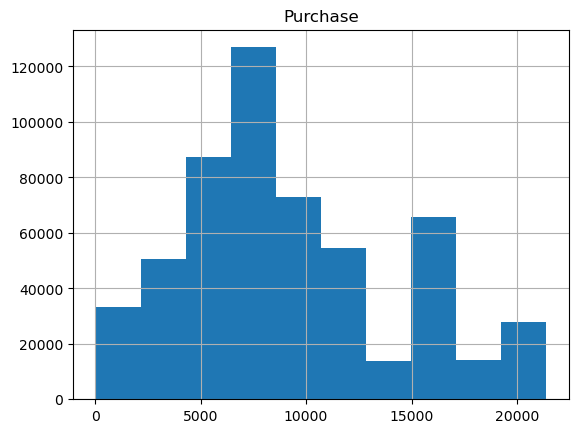

In [63]:
df.hist();

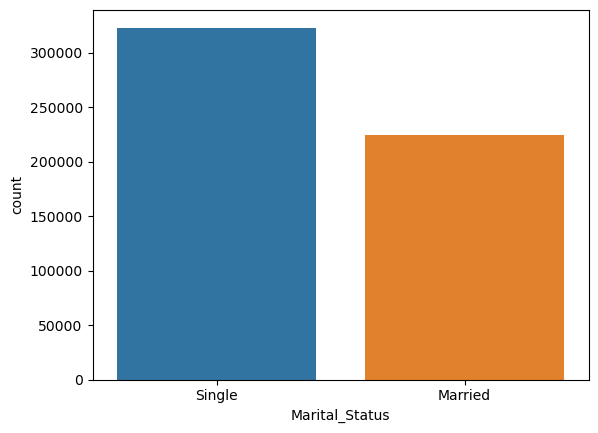

In [64]:
sns.countplot(x='Marital_Status', data=df)
plt.show()

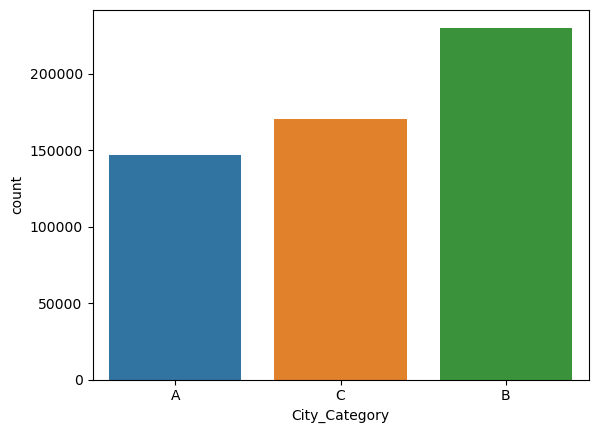

In [65]:
sns.countplot(x='City_Category', data=df)
plt.show()

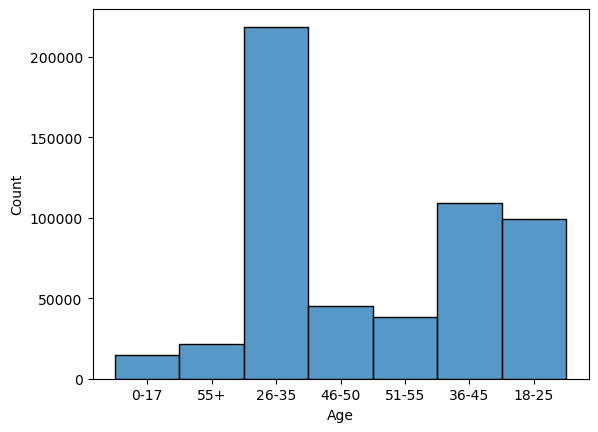

In [66]:
sns.histplot(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

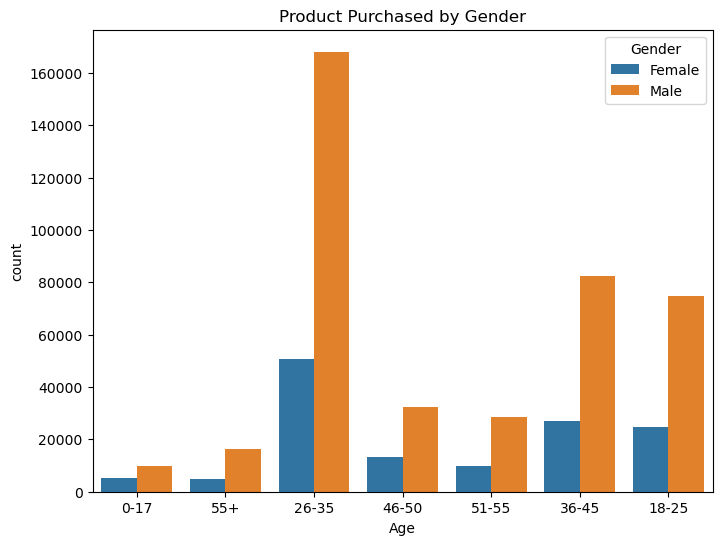

In [67]:
# Countplot of Gender and No. of customers 
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', hue='Gender', data=df)
plt.title('Product Purchased by Gender')
plt.show()

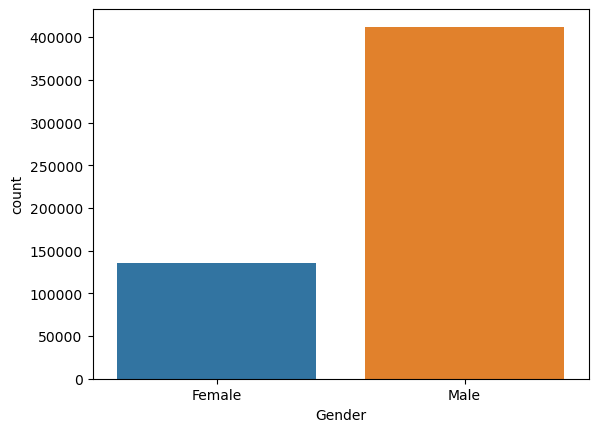

In [68]:
sns.countplot(x='Gender', data=df)
plt.show()

In [69]:
df["Gender"].value_counts(normalize=True)

Male      0.752974
Female    0.247026
Name: Gender, dtype: float64

<center><h1 style="color: red;">Observation</h1></center>

- From the **given sample data**, we can see that : 
    - ~75 % customers are `male`
    - ~25 % customers are `female`
- From the **problem statement**, its also given that the company has 50 million customers are male and 50 million are female overall

- **So, we can see that this sample has some gender bias** 

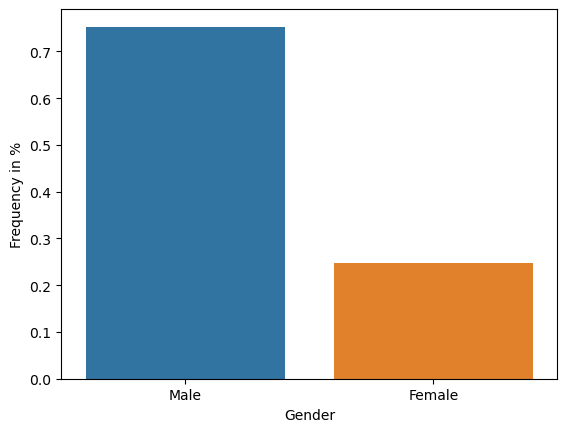

In [70]:
sns.barplot(x = df["Gender"].value_counts(normalize=True).index,
             y = df["Gender"].value_counts(normalize=True))
plt.xlabel("Gender")
plt.ylabel("Frequency in %")
plt.show()

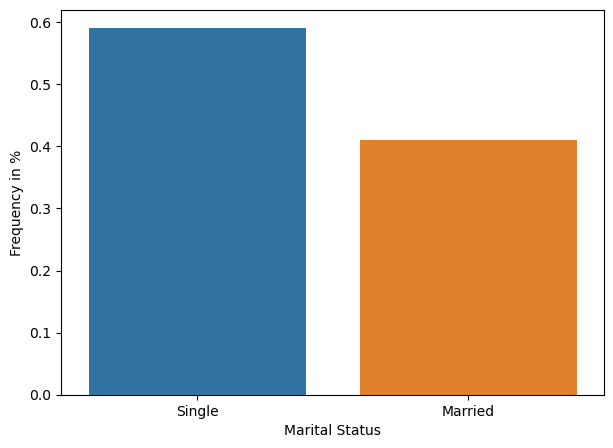

In [71]:
plt.figure(figsize=(7,5))
sns.barplot(x = df["Marital_Status"].value_counts(normalize=True).index,
             y = df["Marital_Status"].value_counts(normalize=True))
plt.xlabel("Marital Status")
plt.ylabel("Frequency in %")
plt.show()

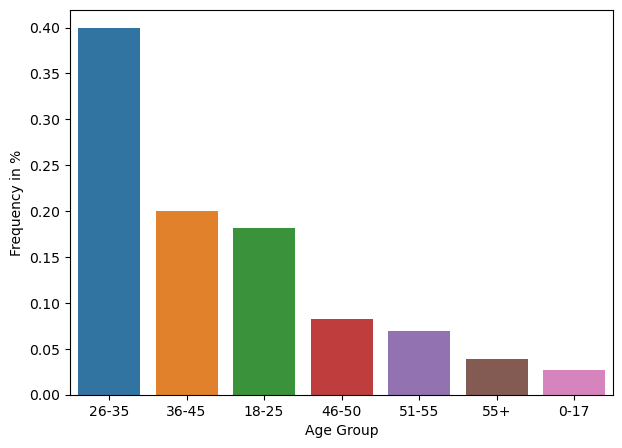

In [72]:
plt.figure(figsize=(7,5))
sns.barplot(x = df["Age"].value_counts(normalize=True).index,
             y = df["Age"].value_counts(normalize=True))
plt.xlabel("Age Group")
plt.ylabel("Frequency in %")
plt.show()

## Purchase Statistic for `Male` and `Female` Data 

In [73]:
female_data = df.loc[df["Gender"]=="Female"]
female_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0


In [74]:
male_data = df.loc[df["Gender"]=="Male"]
male_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


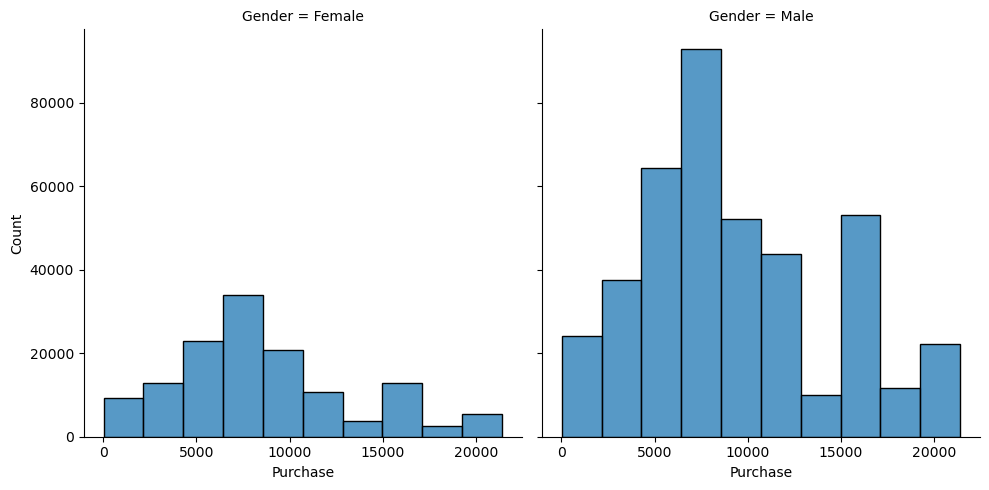

In [75]:
sns.displot(x = df["Purchase"], bins = 10, col=df["Gender"])
plt.show()

## Purchase Statistic for `Married` and `Singe` Customer Data

In [76]:
married_data = df.loc[df["Marital_Status"]=="Single"]
married_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,323242.0,9201.581849,4948.327397,12.0,5480.0,8035.0,12028.0,21399.0


In [109]:
single_data = df.loc[df["Marital_Status"]=="Married"]
single_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,224149.0,9187.040076,4925.205232,12.0,5833.0,8042.0,12006.0,21398.0


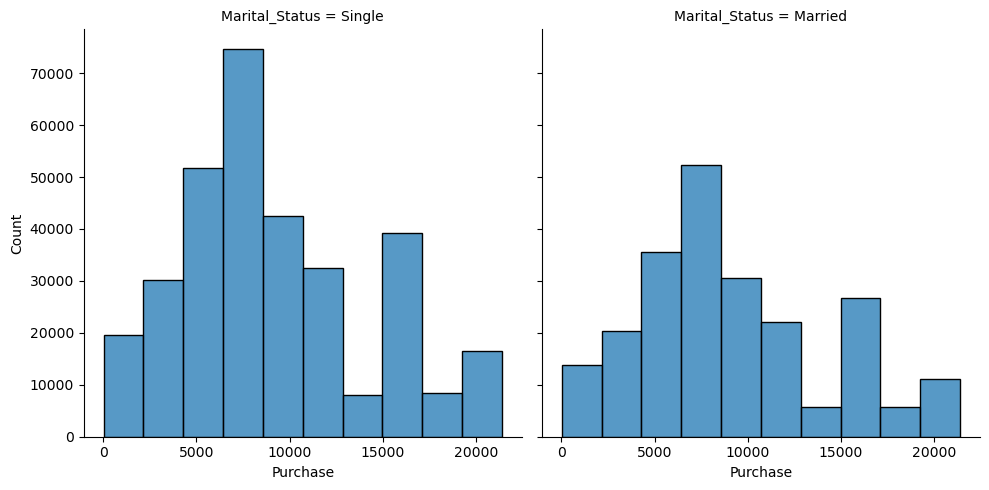

In [110]:
sns.displot(x = df["Purchase"], bins = 10, col=df["Marital_Status"])
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase'>

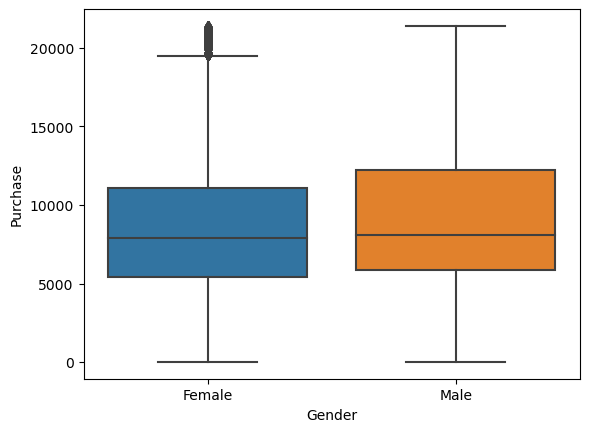

In [79]:
sns.boxplot(x = "Gender", y = "Purchase", data = df)

In [184]:
def dist_box_violin(data):
    Name = data.name.capitalize()
    fig, axes = plt.subplots(1, 3, figsize=(17, 7))
    fig.suptitle("Spread of data for " + Name, fontsize=18, fontweight='bold')

    # Histogram with mean, median, and mode
    sns.histplot(data, kde=False, color='green', ax=axes[0])
    axes[0].axvline(data.mean(), color='blue', linestyle='--', linewidth=2)
    axes[0].axvline(data.median(), color='red', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0], color='purple', linestyle='solid', linewidth=2)
    axes[0].legend({'Mean': data.mean(), 'Median': data.median(), 'Mode': data.mode()})

    # Box plot
    sns.boxplot(x=data, showmeans=True, orient='h', color="orange", ax=axes[1])

    # Violin plot
    sns.violinplot(data, ax=axes[2], showmeans=True)

# Detect Outliers

In [80]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data["Purchase"],25)
    Q3 = np.percentile(data["Purchase"],75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data.loc[(data["Purchase"]>lowerbound)&(data["Purchase"]<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"

In [81]:
detect_outliers(df)

'0.0 % Outliers data from input data found'

In [82]:
def detect_and_remove_outliers(data):
    Q1 = np.percentile(data["Purchase"],25)
    Q3 = np.percentile(data["Purchase"],75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    return data.loc[(data["Purchase"]>lowerbound)&(data["Purchase"]<upperbound)]


In [83]:
df = detect_and_remove_outliers(df)

In [84]:
df.shape

(547391, 10)

# Balancing the `gender` despaires

In [85]:
df["Gender"].value_counts(normalize=True)*100

Male      75.297365
Female    24.702635
Name: Gender, dtype: float64

In [86]:
samplemale = df[df["Gender"]=="Male"].sample(n=135809)
samplefemale = df.loc[df["Gender"]=="Female"]
unbiased_data = pd.concat([samplemale,samplefemale])

In [87]:
unbiased_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
118193,1000226,P00320742,Male,36-45,1,C,1,Single,1,7694
120736,1000671,P00365342,Male,18-25,4,C,0,Single,1,11392
546069,1000229,P00372445,Male,18-25,10,C,1,Single,20,493
7054,1001119,P00193242,Male,36-45,1,B,2,Married,6,16565
305033,1004979,P00053042,Male,36-45,2,B,1,Married,5,6909
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,Female,26-35,1,C,1,Married,20,599
550064,1006035,P00375436,Female,26-35,1,C,3,Single,20,371
550065,1006036,P00375436,Female,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,Female,55+,1,C,2,Single,20,365


## CLT on `Purchase` (`Gender` Wise)

In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

def Bootstrapping_CLT_CI(data, confidence=95, sample_size=30000, trials=200):
    '''
    data : array
    confidence level : Required Confidence Level
    Sample Size  : length of Sample Size
    Trials : How many times we take a sample from data.
    '''
    print("Data Distribution before Sampling/Bootstrap:")
    sns.displot(data, bins=15)
    plt.show()

    bootstrapped_means = np.empty(trials)

    for i in range(trials):
        bootstrap_sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrapped_means[i] = np.mean(bootstrap_sample)

    print("Data Distribution After Sampling/Bootstrapping:")
    sns.displot(bootstrapped_means, bins=15)

    sample_mean = np.mean(bootstrapped_means)
    sample_std = np.std(data)
    standard_error = sample_std / np.sqrt(sample_size)
    t_critical = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    margin_of_error = t_critical * standard_error

    print("t:", t_critical)
    print("sample mean:", sample_mean)
    print("sample standard deviation:", sample_std)
    print("sample size:", sample_size)
    print("standard error:", standard_error)
    print("Margin of Error:", margin_of_error)

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    confidence_interval = (lower_bound, upper_bound)

    plt.axvline(x=lower_bound, c="r")
    plt.axvline(x=upper_bound, c="r")
    plt.show()

    print("Confidence Interval:", confidence_interval)


## Confidence Interval for `Male` (`Purchase`)

Data Distribution before Sampling/Bootstrap:


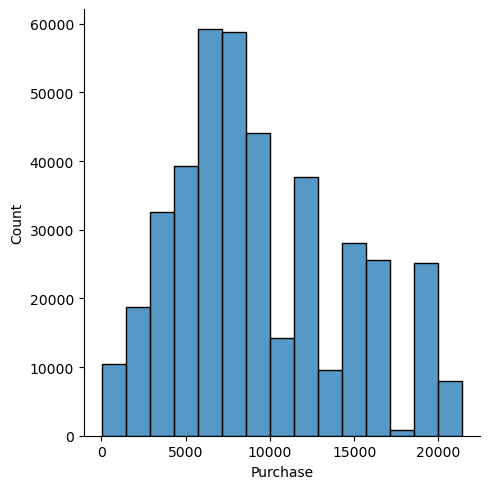

Data Distribution After Sampling/Bootstrapping:
t: 1.9602012636213575
sample mean: 9368.0446454
sample standard deviation: 5009.228011297518
sample size: 10000
standard error: 50.092280112975175
Margin of Error: 98.19095077512894


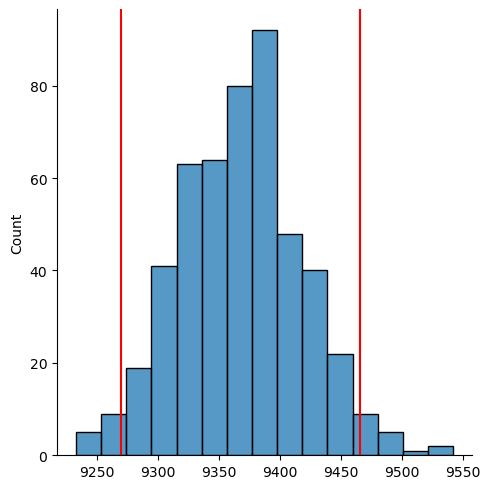

Confidence Interval: (9269.85369462487, 9466.23559617513)


In [90]:
Bootstrapping_CLT_CI(male_data["Purchase"],sample_size=10000,trials=500)

## Confidence Interval for `Female` (`Purchase`)

Data Distribution before Sampling/Bootstrap:


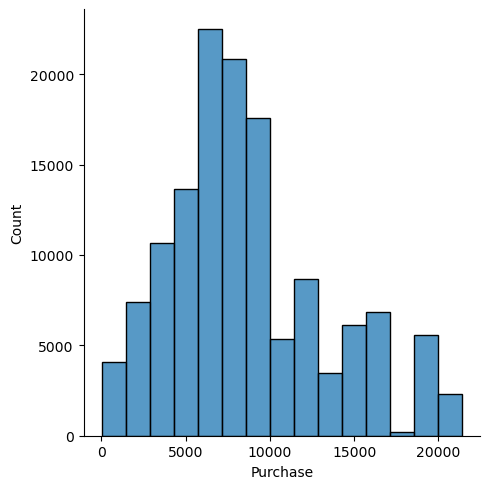

Data Distribution After Sampling/Bootstrapping:
t: 1.9602012636213575
sample mean: 8674.1958022
sample standard deviation: 4679.041181401486
sample size: 10000
standard error: 46.79041181401486
Margin of Error: 91.71862436319562


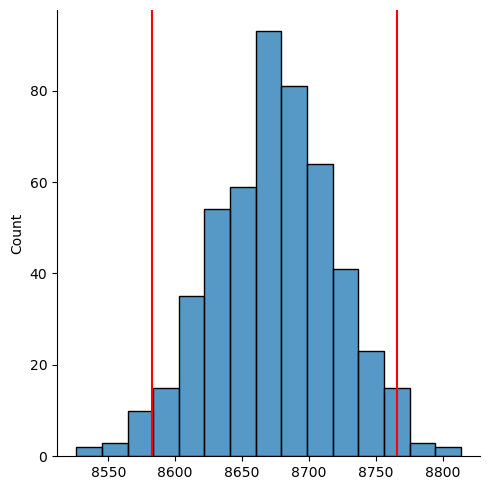

Confidence Interval: (8582.477177836805, 8765.914426563195)


In [91]:
Bootstrapping_CLT_CI(female_data["Purchase"],sample_size=10000,trials=500)

In [92]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt

def plot_confidence_interval(x, values, color='#2187bb', horizontal_line_width=0.25, confidence=95):
    
    def calculate_confidence_interval(data, confidence, sample_size=10000, trials=500):
        bootstrapped_means = np.empty(trials)

        for i in range(trials):
            bootstrap_sample = np.random.choice(data, size=sample_size, replace=True)
            bootstrapped_means[i] = np.mean(bootstrap_sample)

        sample_mean = np.mean(bootstrapped_means)
        sample_std = np.std(data)
        standard_error = sample_std / sqrt(sample_size)
        t_critical = t.ppf((1 - (1 - (confidence / 100)) / 2), df=sample_size - 1)
        margin_of_error = t_critical * standard_error

        return margin_of_error, sample_mean + margin_of_error, sample_mean - margin_of_error
    
    error, bottom, top = calculate_confidence_interval(values, confidence)

    left = x - horizontal_line_width / 2
    right = x + horizontal_line_width / 2

    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, np.mean(values), 'o', color='#f44336')

    print("Confidence Interval:", (top, bottom))
    print("Sample Mean:", np.mean(values), "and", "Margin of Error:", error)


## Estimate of Average Spending Amount 
>with `95% confidence` for spendings of Male and Female Customers

Confidence Interval: (9270.342023624871, 9466.72392517513)
Sample Mean: 9367.724354697444 and Margin of Error: 98.19095077512894
Confidence Interval: (8576.257768236805, 8759.695016963195)
Sample Mean: 8671.049038603756 and Margin of Error: 91.71862436319562


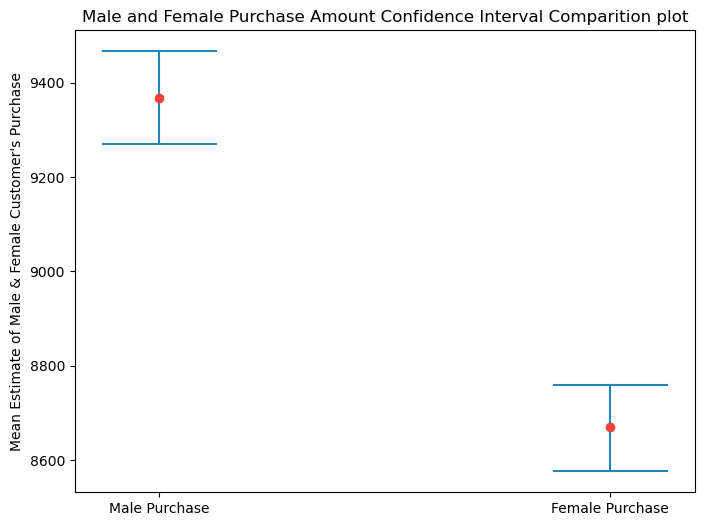

In [93]:
plt.figure(figsize=(8,6))

plot_confidence_interval(x=1,values=male_data["Purchase"])
plot_confidence_interval(x=2,values=female_data["Purchase"])
plt.xticks([1,2],["Male Purchase","Female Purchase"])
plt.title("Male and Female Purchase Amount Confidence Interval Comparition plot")
plt.ylabel("Mean Estimate of Male & Female Customer's Purchase")
plt.show()

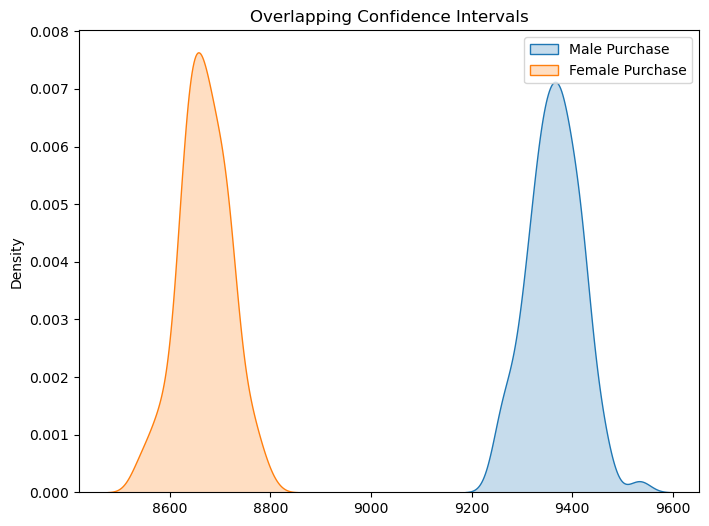

In [94]:
def calculate_expense_means(data, sample_size, num_samples):
    expense_means = [data['Purchase'].sample(sample_size).mean() for _ in range(num_samples)]
    return expense_means

sample_size = 10000
num_samples = 100

male_expense_mean = calculate_expense_means(male_data, sample_size, num_samples)
female_expense_mean = calculate_expense_means(female_data, sample_size, num_samples)

plt.figure(figsize=(8, 6))
sns.kdeplot(male_expense_mean, fill=True, label="Male Purchase")
sns.kdeplot(female_expense_mean, fill=True, label="Female Purchase")
plt.title("Overlapping Confidence Intervals")
plt.legend()
plt.show()


<center><h1 style="color: red;">Observation</h1></center>

Following are the observation with 95% confidence and sample size of 10000 , 500 trials

- As per confidence Interval comparison for both female purchase and male purchase data , its clear  that there's no over lapping , and hence there's a good amount of difference between Male and Female Spending amounts . 

- Male Customers are more likely to spend more amount than female customers . 

- Average Male Spending Amount from all 100 million customers lies in Range of 9333 to 9533 as per Bootstrapping Method

- Average Female Spending Amount from all 100 million customers lies in Range of 8639 to 8826 as per Bootstrapping Method

In [95]:
data = unbiased_data.copy()
data["Age"].value_counts(normalize=True)*100

26-35    39.106885
36-45    19.880160
18-25    18.253766
46-50     8.758841
51-55     7.106620
55+       3.825052
0-17      3.068675
Name: Age, dtype: float64

## Confidence Interval for overall `Purchase`

Data Distribution before Sampling/Bootstrap:


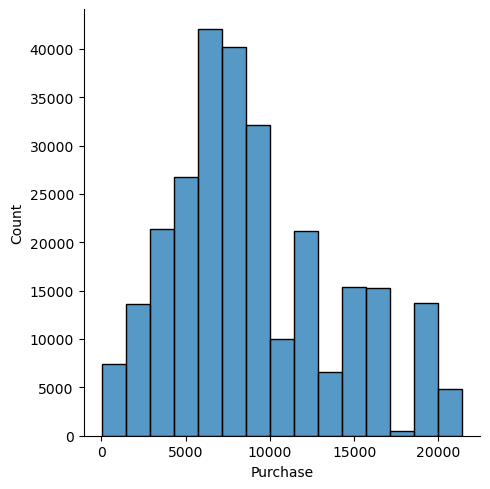

Data Distribution After Sampling/Bootstrapping:
t: 1.9602012636213575
sample mean: 9012.4231546
sample standard deviation: 4853.057319748064
sample size: 10000
standard error: 48.53057319748064
Margin of Error: 95.12969090597034


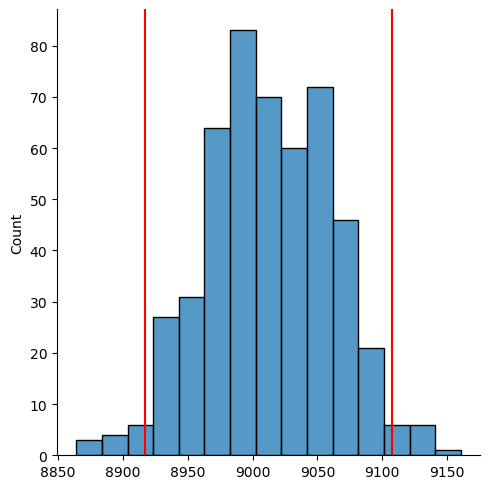

Confidence Interval: (8917.293463694028, 9107.55284550597)


In [96]:
Bootstrapping_CLT_CI(unbiased_data["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount 
>with `95% confidence` for spendings of all Customers

Confidence Interval: (8916.023849294028, 9106.28323110597)
Sample Mean: 9011.957790494744 and Margin of Error: 95.12969090597034


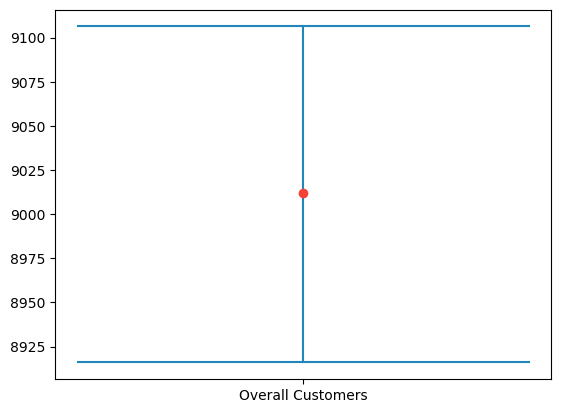

In [97]:
plot_confidence_interval(x=1,values=data["Purchase"])
plt.xticks([1],["Overall Customers"])
plt.show()

## Confidence Interval for `Married` People Purchase Data

In [98]:
unbiased_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
118193,1000226,P00320742,Male,36-45,1,C,1,Single,1,7694
120736,1000671,P00365342,Male,18-25,4,C,0,Single,1,11392
546069,1000229,P00372445,Male,18-25,10,C,1,Single,20,493
7054,1001119,P00193242,Male,36-45,1,B,2,Married,6,16565
305033,1004979,P00053042,Male,36-45,2,B,1,Married,5,6909
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,Female,26-35,1,C,1,Married,20,599
550064,1006035,P00375436,Female,26-35,1,C,3,Single,20,371
550065,1006036,P00375436,Female,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,Female,55+,1,C,2,Single,20,365


Data Distribution before Sampling/Bootstrap:


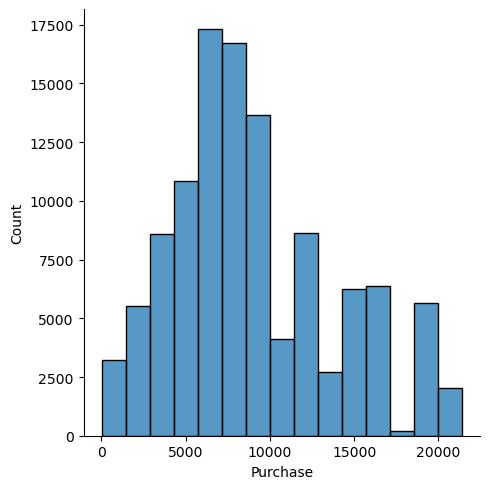

Data Distribution After Sampling/Bootstrapping:
t: 1.9602012636213575
sample mean: 9023.3125194
sample standard deviation: 4850.164577765977
sample size: 10000
standard error: 48.50164577765977
Margin of Error: 95.07298734108416


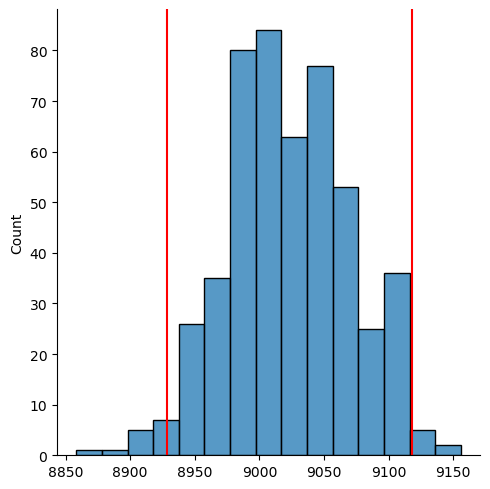

Confidence Interval: (8928.239532058917, 9118.385506741084)


In [99]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Married"]["Purchase"],sample_size=10000,trials=500)

Data Distribution before Sampling/Bootstrap:


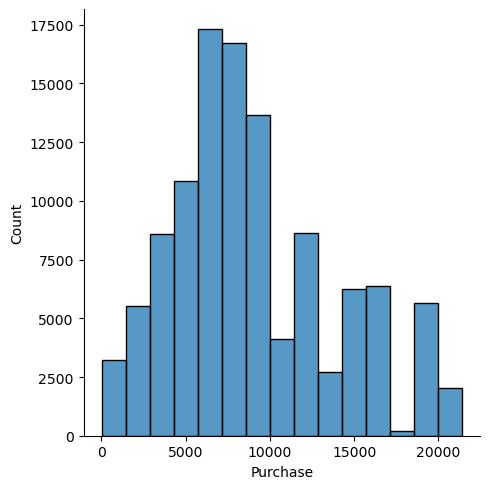

Data Distribution After Sampling/Bootstrapping:
t: 1.9602012636213575
sample mean: 9025.032250800003
sample standard deviation: 4850.164577765977
sample size: 10000
standard error: 48.50164577765977
Margin of Error: 95.07298734108416


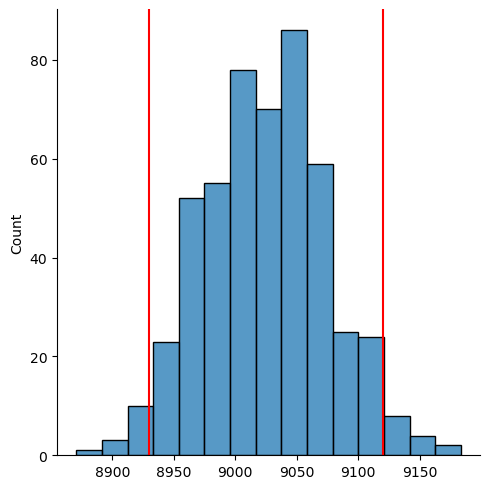

Confidence Interval: (8929.959263458919, 9120.105238141086)


In [100]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Married"]["Purchase"],sample_size=10000,trials=500)

## Confidence Interval for `Single` People Purchase Data

Data Distribution before Sampling/Bootstrap:


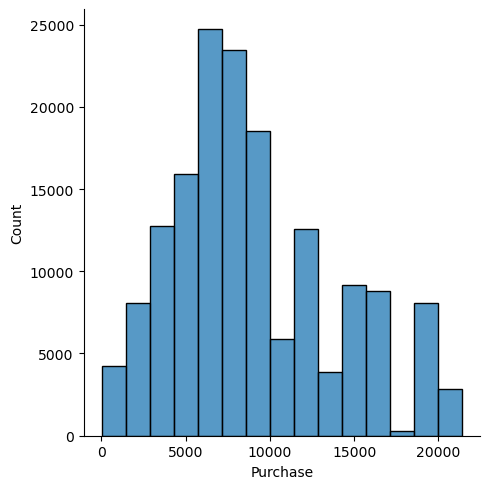

Data Distribution After Sampling/Bootstrapping:
t: 1.9602012636213575
sample mean: 9003.5821142
sample standard deviation: 4855.067530547763
sample size: 10000
standard error: 48.55067530547763
Margin of Error: 95.1690950834675


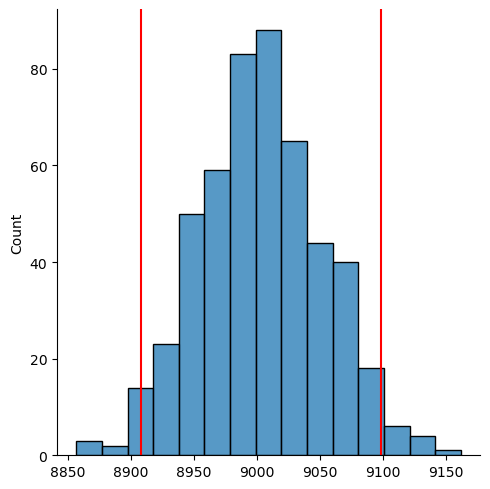

Confidence Interval: (8908.413019116533, 9098.751209283468)


In [102]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Single"]["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount 
>with 95% confidence for Married and Single Customers

Confidence Interval: (9104.479143865017, 9298.473196134986)
Sample Mean: 9201.581848893398 and Margin of Error: 96.9970261349839
Confidence Interval: (9090.426239166149, 9283.513678833848)
Sample Mean: 9187.040076020861 and Margin of Error: 96.54371983384888


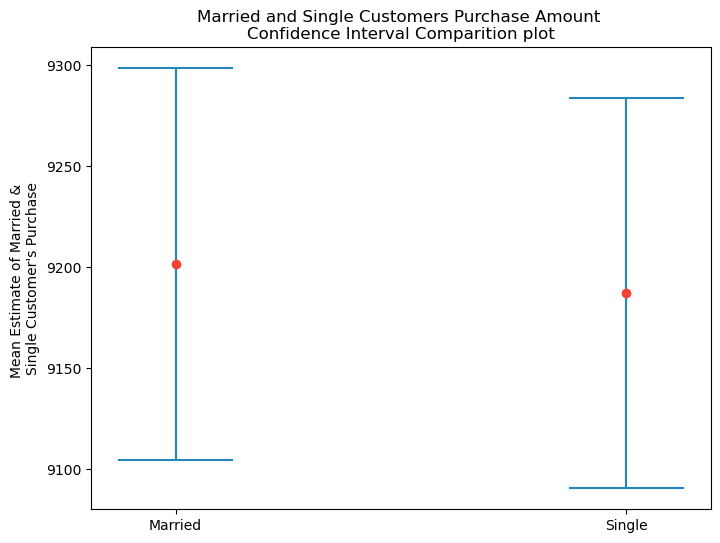

In [103]:
plt.figure(figsize=(8,6))
plot_confidence_interval(x=1,values=married_data["Purchase"])
plot_confidence_interval(x=2,values=singe_data["Purchase"])
plt.xticks([1,2],["Married","Single"])
plt.title("Married and Single Customers Purchase Amount \nConfidence Interval Comparition plot")
plt.ylabel("Mean Estimate of Married & \nSingle Customer's Purchase")
plt.show()

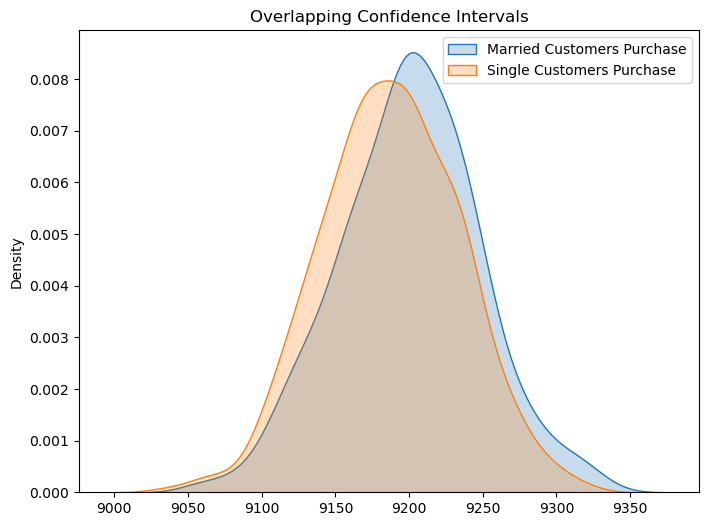

In [112]:
def calculate_expense_means(data, sample_size, num_samples):
    expense_means = [data['Purchase'].sample(sample_size).mean() for _ in range(num_samples)]
    return expense_means

sample_size = 10000
num_samples = 500

married_expenses_mean = calculate_expense_means(married_data, sample_size, num_samples)
single_expenses_mean = calculate_expense_means(single_data, sample_size, num_samples)

plt.figure(figsize=(8, 6))
sns.kdeplot(married_expenses_mean, fill=True, label="Married Customers Purchase")
sns.kdeplot(single_expenses_mean, fill=True, label="Single Customers Purchase")
plt.title("Overlapping Confidence Intervals")
plt.legend()
plt.show()


<center><h1 style="color: red;">Observation</h1></center>

- As per confidence Interval comparison for both Single and Married Customer's average purchase data 
> There is not much difference between their average spending amounts. Married and Single Customer's spending amounts distribution are almost lies with same distribution.

# Confidence Interval with `different` Sample Size

In [113]:
def calculate_confidence_interval(data, confidence=95, sample_size=10000, trials=500):
    bootstrapped_mean = np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size, replace=True)
        bootstrapped_mean[i] = np.mean(btssample)

    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std / np.sqrt(sample_size)
    t_alpha_by2 = t.ppf((1 - ((1 - (confidence / 100)) / 2)), df=sample_size - 1)
    margin_of_error = t_alpha_by2 * standard_error
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    confidence_interval = (lower_bound, upper_bound)

    print()
    print("Confidence Level:", confidence)
    print("Sample Size:", sample_size)
    print("Margin of Error:", margin_of_error)

    return f"Confidence Interval: {confidence_interval}"


In [114]:
# Confidence Interval Calculations for Different Age Groups 
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for age_group in age_groups:
    print("Age Group:", age_group)
    age_data = data.loc[data["Age"] == age_group]["Purchase"]
    confidence_interval = calculate_confidence_interval(age_data)
    print(confidence_interval)
    print()


Age Group: 0-17

Confidence Level: 95
Sample Size: 10000
Margin of Error: 96.60856880773487
Confidence Interval: (8530.311565792264, 8723.528703407734)

Age Group: 18-25

Confidence Level: 95
Sample Size: 10000
Margin of Error: 95.73775119621878
Confidence Interval: (8762.963975603781, 8954.439477996219)

Age Group: 26-35

Confidence Level: 95
Sample Size: 10000
Margin of Error: 94.84029459866774
Confidence Interval: (8924.022922201331, 9113.703511398666)

Age Group: 36-45

Confidence Level: 95
Sample Size: 10000
Margin of Error: 95.34810484947728
Confidence Interval: (9021.928946350521, 9212.625156049477)

Age Group: 46-50

Confidence Level: 95
Sample Size: 10000
Margin of Error: 94.23561542896758
Confidence Interval: (8879.321817771031, 9067.793048628968)

Age Group: 51-55

Confidence Level: 95
Sample Size: 10000
Margin of Error: 95.28875351421043
Confidence Interval: (9141.862907685789, 9332.44041471421)

Age Group: 55+

Confidence Level: 95
Sample Size: 10000
Margin of Error: 93.75

## Estimate of Average Spending Amount 
>with 95% confidence for different Age group

Age Group :  0-17
Confidence Interval: (8525.564306192266, 8718.781443807735)
Sample Mean: 8624.969339906216 and Margin of Error: 96.60856880773487
Age Group :  18-25
Confidence Interval: (8763.199158203783, 8954.67466059622)
Sample Mean: 8858.663574070706 and Margin of Error: 95.73775119621878
Age Group :  26-35
Confidence Interval: (8920.207122001333, 9109.887711198668)
Sample Mean: 9015.120170580522 and Margin of Error: 94.84029459866774
Age Group :  36-45
Confidence Interval: (9022.397093350522, 9213.093303049478)
Sample Mean: 9117.182457638128 and Margin of Error: 95.34810484947728
Age Group :  46-50
Confidence Interval: (8882.353665971032, 9070.824896828968)
Sample Mean: 8976.210918741312 and Margin of Error: 94.23561542896758
Age Group :  51-55
Confidence Interval: (9142.734440685788, 9333.31194771421)
Sample Mean: 9238.947873942163 and Margin of Error: 95.28875351421043
Age Group :  55+
Confidence Interval: (9038.102722737758, 9225.617718462241)
Sample Mean: 9134.872094144883 a

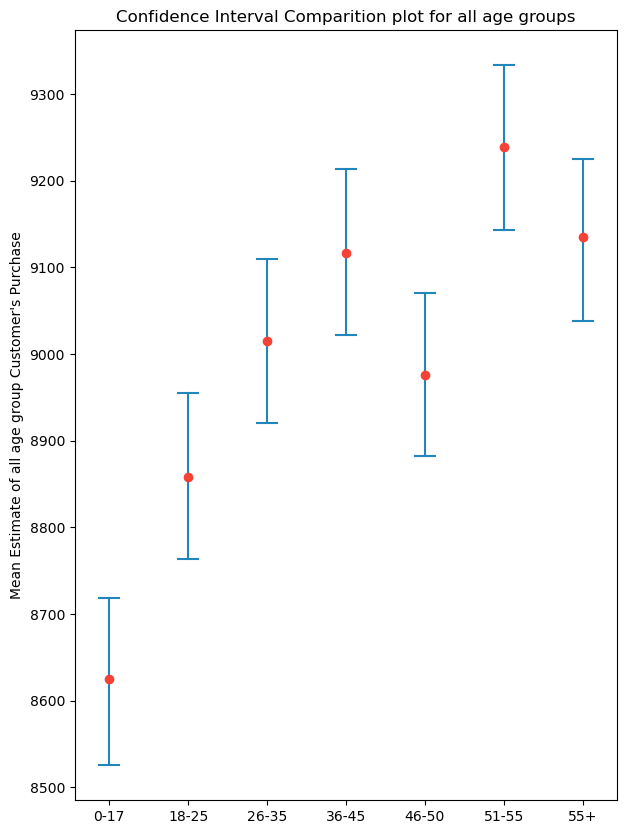

In [115]:
plt.figure(figsize=(7,10))
i = 1
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    print("Age Group : ", age_group)
    (plot_confidence_interval(i,data.loc[data["Age"]==age_group]["Purchase"]))
    i = i+1

plt.xticks([1,2,3,4,5,6,7],['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+'])

plt.title("Confidence Interval Comparition plot for all age groups")
plt.ylabel("Mean Estimate of all age group Customer's Purchase")
plt.show()

    
plt.show()

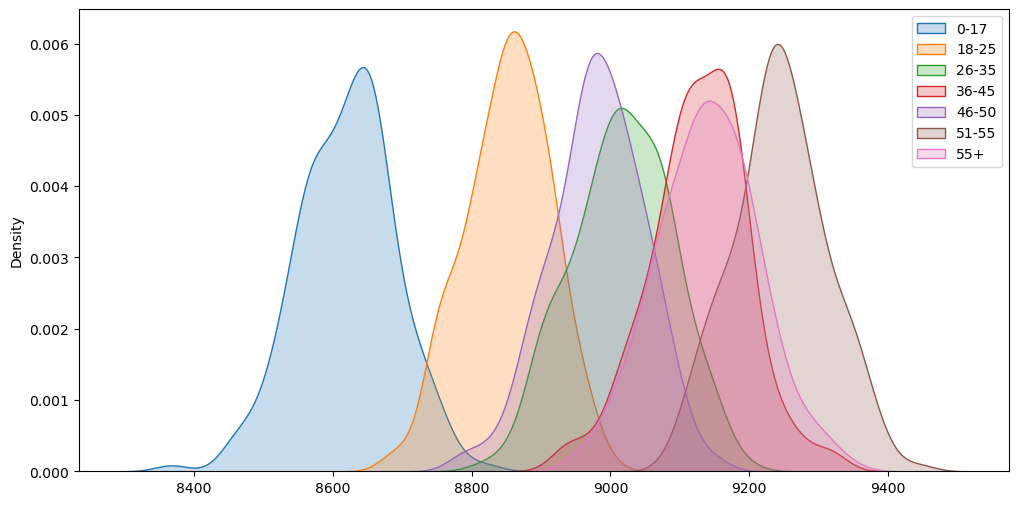

In [122]:
plt.figure(figsize=(12, 6))

for age_group in ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']:
    age_data = data.loc[data["Age"] == age_group]["Purchase"]
    x = [age_data.sample(5000, replace=True).mean() for _ in range(200)]
    sns.kdeplot(x, fill=True, label=age_group)

plt.legend()
plt.show();



<center><h1 style="color: red;">Observation</h1></center>

- Customers from age 26-35 are 40% of all customers. and their Average Spending amount is near to overall customers average spending amount
- Age group 51-55 customers are more likely to spend more amount than all other groups
- Customers under 17 age are the least spending average amount

## Impact on Confidence Interval with Different Sample Size

In [123]:
print(calculate_confidence_interval(data["Purchase"],sample_size=50))
print(calculate_confidence_interval(data["Purchase"],sample_size=250))
print(calculate_confidence_interval(data["Purchase"],sample_size=750))
print(calculate_confidence_interval(data["Purchase"],sample_size=1500))
print(calculate_confidence_interval(data["Purchase"],sample_size=5000))
print(calculate_confidence_interval(data["Purchase"],sample_size=25000))


Confidence Level: 95
Sample Size: 50
Margin of Error: 1379.2236280010134
Confidence Interval: (7653.916971998988, 10412.364228001014)

Confidence Level: 95
Sample Size: 250
Margin of Error: 604.5184097782867
Confidence Interval: (8394.142118221713, 9603.178937778288)

Confidence Level: 95
Sample Size: 750
Margin of Error: 347.88462623561367
Confidence Interval: (8656.045957764387, 9351.815210235613)

Confidence Level: 95
Sample Size: 1500
Margin of Error: 245.79253535061522
Confidence Interval: (8764.533368649387, 9256.118439350616)

Confidence Level: 95
Sample Size: 5000
Margin of Error: 134.54999127759322
Confidence Interval: (8876.730579522406, 9145.830562077594)

Confidence Level: 95
Sample Size: 25000
Margin of Error: 60.16092914610573
Confidence Interval: (8951.697959093894, 9072.019817386106)


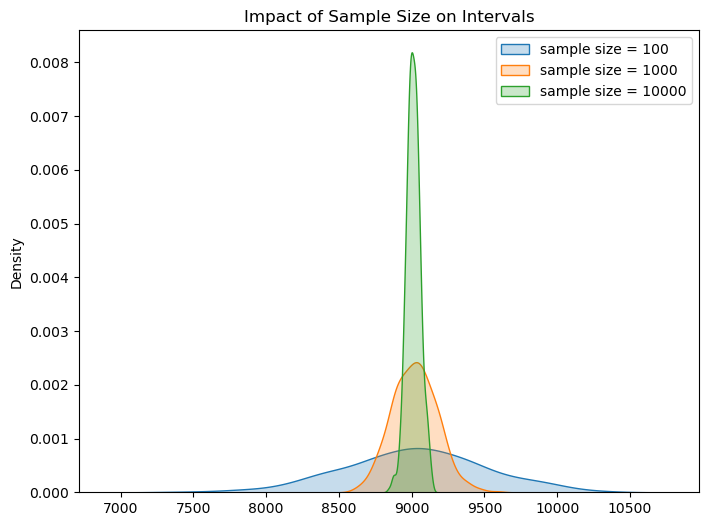

In [125]:
sample_sizes = [100, 1000, 10000]
sample_means = []

for size in sample_sizes:
    sample_mean = [data['Purchase'].sample(size).mean() for _ in range(500)]
    sample_means.append(sample_mean)

plt.figure(figsize=(8, 6))

for i, size in enumerate(sample_sizes):
    sns.kdeplot(sample_means[i], fill=True, label=f"sample size = {size}")

plt.title("Impact of Sample Size on Intervals")
plt.legend()
plt.show()


<center><h1 style="color: red;">Observation</h1></center>

- As per calculations and above distribution plot, as we increase the sample size, standard error decreases , means that the average spending amount gets closers and closer to the actual mean spending amount of the all customer average spending amount.


In [127]:
print(calculate_confidence_interval(data["Purchase"],confidence=90,sample_size=10000))
print(calculate_confidence_interval(data["Purchase"],confidence=95,sample_size=10000))
print(calculate_confidence_interval(data["Purchase"],confidence=99,sample_size=10000))


Confidence Level: 90
Sample Size: 10000
Margin of Error: 79.83308570991127
Confidence Interval: (8930.830820690087, 9090.496992109911)

Confidence Level: 95
Sample Size: 10000
Margin of Error: 95.12969090597034
Confidence Interval: (8918.978376694029, 9109.237758505971)

Confidence Level: 99
Sample Size: 10000
Margin of Error: 125.03033952268214
Confidence Interval: (8885.474676877318, 9135.535355922682)


Confidence Interval: (8940.603147638438, 9080.336455961562)
Sample Mean: 9011.957790494744 and Margin of Error: 69.866654161562
Confidence Interval: (8930.416619290088, 9090.082790709912)
Sample Mean: 9011.957790494744 and Margin of Error: 79.83308570991127
Confidence Interval: (8915.765549494028, 9106.02493130597)
Sample Mean: 9011.957790494744 and Margin of Error: 95.12969090597034
Confidence Interval: (8886.249272677318, 9136.309951722682)
Sample Mean: 9011.957790494744 and Margin of Error: 125.03033952268214


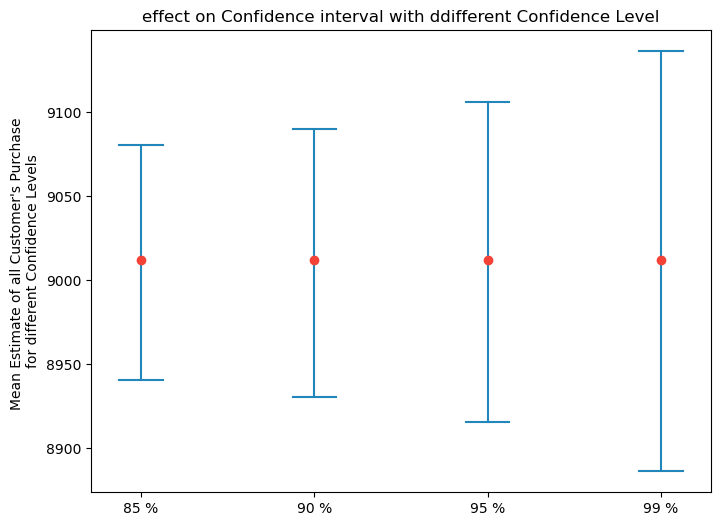

In [128]:
plt.figure(figsize=(8,6))
plot_confidence_interval(x=0,values=data["Purchase"],confidence=85)
plot_confidence_interval(x=1,values=data["Purchase"],confidence=90)
plot_confidence_interval(x=2,values=data["Purchase"],confidence=95)
plot_confidence_interval(x=3,values=data["Purchase"],confidence=99)
plt.xticks([0,1,2,3],["85 %","90 %","95 %","99 %"])
plt.title("effect on Confidence interval with ddifferent Confidence Level")
plt.ylabel("Mean Estimate of all Customer's Purchase \nfor different Confidence Levels")
plt.show()

<center><h1 style="color: red;">Observation</h1></center>

- As we decide to increase the confidence level , the interval of confidence for given parameter gets wider


# Product Category

In [129]:
pro_cat = (data.groupby("Product_Category")["Purchase"].sum()/data["Purchase"].sum()*100).sort_values(ascending=False)
pro_cat

Product_Category
1     34.906836
5     20.044411
8     18.440023
6      6.311882
2      5.411625
3      4.443503
16     2.899018
11     2.121996
15     1.546261
7      1.237963
10     0.925729
4      0.618274
14     0.510102
18     0.150122
12     0.131079
17     0.108649
9      0.087715
13     0.083548
20     0.019989
19     0.001274
Name: Purchase, dtype: float64

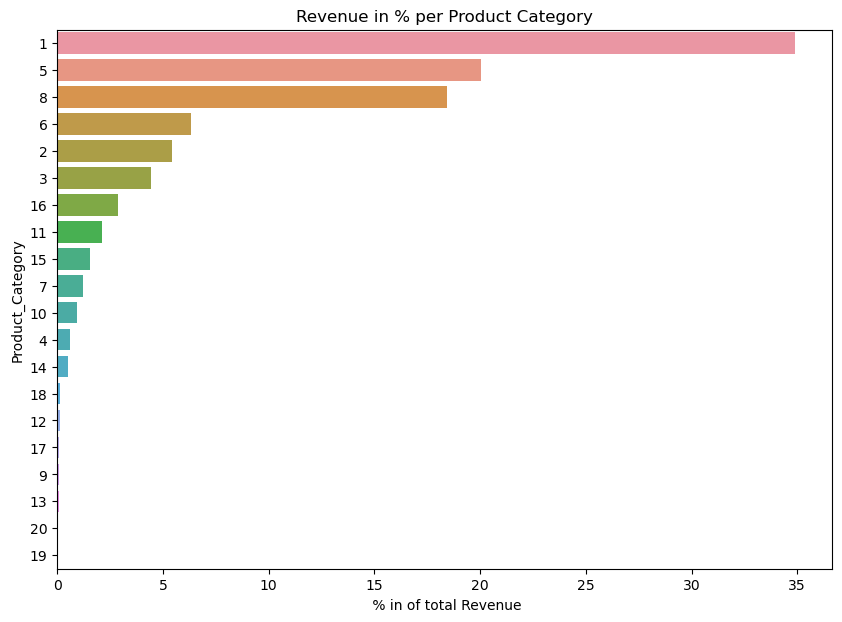

In [130]:
plt.figure(figsize=(10,7))

sns.barplot(x = pro_cat,
           y = pro_cat.index
           )
plt.title("Revenue in % per Product Category")
plt.xlabel(" % in of total Revenue")
plt.show()

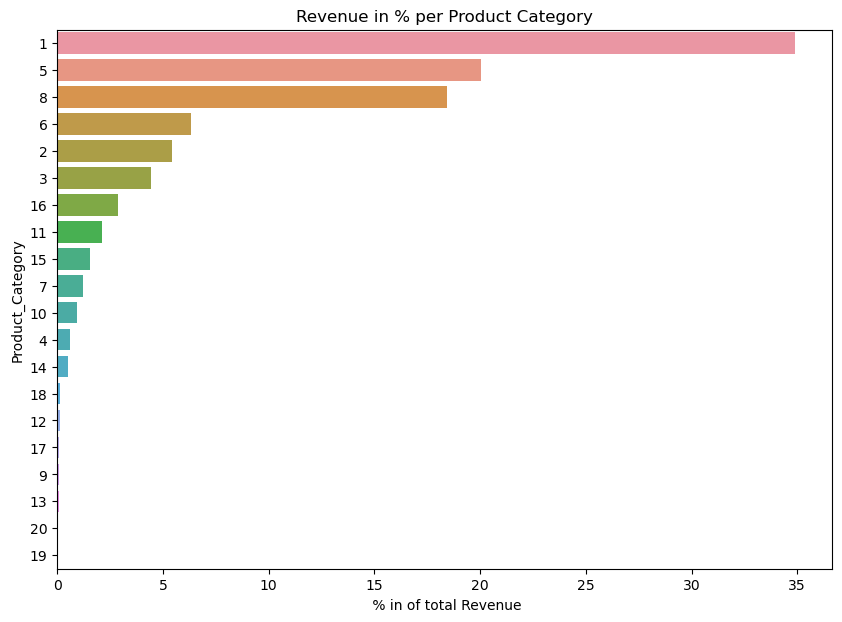

In [133]:
plt.figure(figsize=(10,7))

sns.barplot(x = pro_cat,
           y = pro_cat.index
           )
plt.title("Revenue in % per Product Category")
plt.xlabel(" % in of total Revenue")
plt.show()

In [166]:
import warnings
warnings.filterwarnings('ignore')

## Most Common Product Categories

In [167]:
groupedf = data.loc[data["User_ID"].duplicated(keep = False)]
groupedf.shape

(271009, 10)

In [168]:
groupedf["Group Order"] = groupedf.groupby("User_ID")["Product_Category"].transform(lambda  x : ",".join(x))
groupedf["Group Order"] = groupedf["Group Order"].apply(lambda x: ",".join(np.unique(x.split(","))))
uniq_orders = groupedf[["User_ID","Group Order"]].drop_duplicates()

In [170]:
uniq_orders.describe()

,User_ID,Group Order
count,5865,5865
unique,5865,2798
top,1000226,"1,5,8"
freq,1,135


In [171]:
from collections import Counter
from itertools import combinations

freq = Counter()
for r in groupedf["Group Order"]:
    
    row_list = r.split(",")
    freq.update(Counter(combinations(row_list,4)))
grouped_ordered_categories = freq.most_common(15)
grouped_ordered_categories

[(('1', '2', '5', '8'), 218577),
 (('1', '5', '6', '8'), 211639),
 (('1', '3', '5', '8'), 200157),
 (('1', '11', '5', '8'), 191798),
 (('1', '2', '5', '6'), 188872),
 (('2', '5', '6', '8'), 188670),
 (('1', '2', '6', '8'), 188630),
 (('1', '2', '3', '5'), 185372),
 (('1', '4', '5', '8'), 184000),
 (('2', '3', '5', '8'), 183475),
 (('1', '2', '3', '8'), 183125),
 (('1', '11', '2', '5'), 175872),
 (('1', '11', '2', '8'), 175078),
 (('11', '2', '5', '8'), 174945),
 (('1', '2', '4', '5'), 173659)]

In [172]:
cat_sold_together = pd.DataFrame(data=[217471,211573,198821,190851,189101,188376,188322,184308,
183249,182173,181778,175369,174108,173908,172663],
    index = ["'1', '2', '5', '8'",  "'1', '5', '6', '8'  ","'1', '3', '5', '8'  ",
"'1', '11','5', '8'  ","'1', '2', '5', '6'  ","'1', '2', '6', '8'  ",
"'2', '5', '6', '8'  ","'1', '2', '3', '5'  ","'1', '4', '5', '8'  ",
"'2', '3', '5', '8'  ","'1', '2', '3', '8'  ","'1', '11','2', '5'  ",
"'1', '11','2', '8'  ","'11', '2','5', '8'  ","'1', '3', '5', '6'  "],columns=["Orders"] 
)

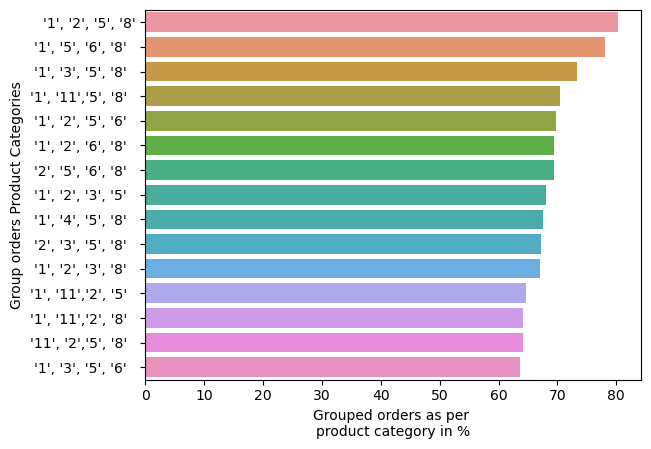

In [173]:
cat_sold_together["group_order_in_percentage"] = (cat_sold_together["Orders"]/len(data))*100
group_order_in_percentage = cat_sold_together["group_order_in_percentage"]
sns.barplot(x = group_order_in_percentage,
           y = group_order_in_percentage.index)
plt.xlabel("Grouped orders as per \nproduct category in %")
plt.ylabel("Group orders Product Categories")
plt.show()

# City Category

In [174]:
data["City_Category"].value_counts(normalize=True)*100

B    42.228691
C    31.121393
A    26.649916
Name: City_Category, dtype: float64

In [175]:
City_cat = (data.groupby("City_Category")["Purchase"].sum()/data["Purchase"].sum()*100).sort_values(ascending=False)
City_cat

City_Category
B    41.598481
C    32.608572
A    25.792947
Name: Purchase, dtype: float64

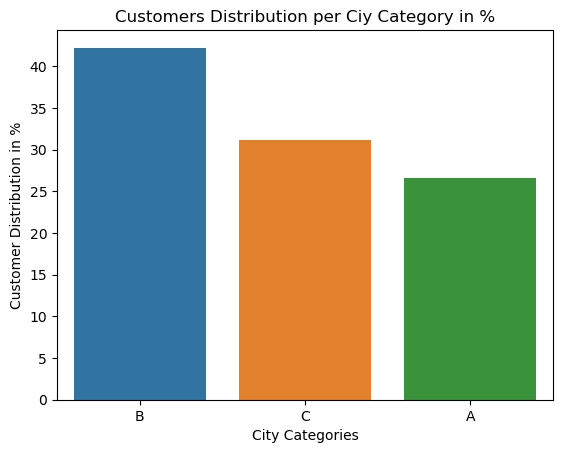

In [176]:
sns.barplot(x = (data["City_Category"].value_counts(normalize=True)*100).index,
            y = (data["City_Category"].value_counts(normalize=True)*100) )

plt.title("Customers Distribution per Ciy Category in %")
plt.xlabel("City Categories")
plt.ylabel("Customer Distribution in %")
plt.show()

In [177]:
pd.crosstab(columns=data["City_Category"],index=data["Age"],normalize="columns")*100

City_Category,A,B,C
Age,,,
0-17,2.490689,2.439451,4.417414
18-25,18.467651,19.271834,16.689192
26-35,49.552119,38.832873,30.534215
36-45,18.456576,20.064306,20.849338
46-50,4.653256,9.590046,11.146678
51-55,4.444198,7.542026,8.795704
55+,1.935511,2.259462,7.567459



<center><h1 style="color: red;">Observation</h1></center>

- Most of Customers from City category A are from 26-35 years age
- Most of Customers from City category B are from 26-35 years age
- Most of Customers from City category C are from 26-35 years age

# Customers their stay in current city (in `years`)

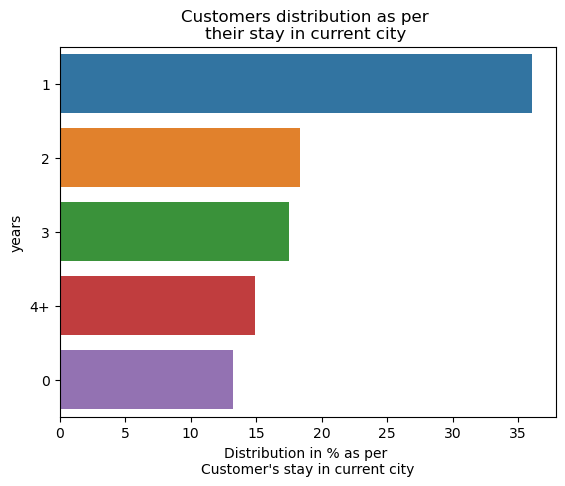

In [179]:
Stayed_in_city_years_cat = data["Stay_In_Current_City_Years"].value_counts(normalize=True)*100

sns.barplot(y = Stayed_in_city_years_cat.index,
             x  = Stayed_in_city_years_cat)
plt.title("Customers distribution as per \ntheir stay in current city ")
plt.ylabel("years")
plt.xlabel("Distribution in % as per \nCustomer's stay in current city")
plt.show()

In [180]:
pd.crosstab(columns=data["City_Category"],index=data["Stay_In_Current_City_Years"],normalize="columns")*100

City_Category,A,B,C
Stay_In_Current_City_Years,,,
0,15.488239,12.479467,12.217243
1,33.489319,37.058330,37.007398
2,18.754240,17.347884,19.310476
3,18.149220,18.525670,15.555793
4+,14.118983,14.588649,15.909091


<center><h1 style="color: red;">Observation</h1></center>

- All city categories are having customers majorly who are living there for 1 to 2 years.

# Revenue generated per age (in % )

In [181]:
ages_d = (data.groupby("Age")["Purchase"].sum()/data["Purchase"].sum())*100

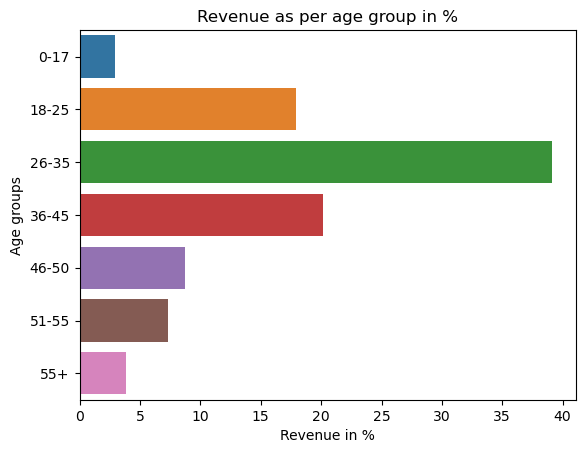

In [182]:
sns.barplot(y = ages_d.index,
             x  = ages_d)
plt.title("Revenue as per age group in %")
plt.ylabel("Age groups")
plt.xlabel("Revenue in %")
plt.show()

# Purchase / Revenue per age / gender group

In [183]:
(pd.crosstab(index= data["Age"],columns=data["Gender"],values=data["Purchase"],aggfunc=np.sum,margins=True)/data["Purchase"].sum())*100

Gender,Female,Male,All
Age,,,
0-17,1.715339,1.221562,2.936901
18-25,8.368708,9.574560,17.943268
26-35,17.952794,21.167814,39.120608
36-45,9.838694,10.273590,20.112283
46-50,4.718200,4.005898,8.724098
51-55,3.587515,3.698104,7.285619
55+,1.822775,2.054447,3.877222
All,48.004026,51.995974,100.000000


<center><h1 style="color: red;">Observation</h1></center>

- Out of all women, 35% of the revenue coming from agae group 18 to 45 and so is same for men as well.